In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from PIL import Image

In [2]:
# function to return pixel value which stably occured most times
def get_stable(a):
    b = a[0:2]
    # print(b)
    j = 0
    # print(j)
    c = [a[0]]
    # print(c)
    for i in range(2, len(a)-1):
        # print(i)
        if a[i] == a[i+1]:
            b = np.append(b, a[i])
            # print(b)
        
    for i in range(1, len(b)-1):
        # print(i)
        # print(b[i])
        # print(c[j])
        if b[i] != c[j]:
            c = np.append(c, b[i])
            j += 1
    return statistics.mode(c)

In [3]:
# function to return pixel value which occured most times
def get_stable2(a):
    b = [a[0]]
    # print(b)
    j = 0
    # print(j)
    for i in range(1, len(a)-1):
        # print(i)
        if a[i] != a[i+1]:
            b.append(a[i])
            # print(b)
        
    return statistics.mode(b)

In [13]:
# read video from file
cap = cv2.VideoCapture('traffic1.mp4')
df = []
while True:
    ret, frame = cap.read()
    if not ret: break # break if no next frame
    
    cv2.imshow('kk', frame) # show frame
    # print(frame)
    df.append(frame)
    if cv2.waitKey(1) & 0xFF == 27: # on press of Ecs break
        break
        
# release and destroy windows
cap.release()
cv2.destroyAllWindows()

In [5]:
arr = np.array(df)
print(arr.shape)

(156, 720, 1280, 3)


In [8]:
# direct application of MODE function as filter
for x in range(still.shape[0]):
    for y in range(still.shape[1]):
        for z in range(3):
            # print([x,y,z])
            still[x, y, z] = statistics.mode(arr[:,x,y,z])

In [22]:
# using custom bould filter "get_stable"
for x in range(still.shape[0]):
    for y in range(still.shape[1]):
        for z in range(3):
            # print([x,y,z])
            still[x, y, z] = get_stable(arr[:,x,y,z])

#still.shape

In [18]:
# # using custom bould filter "get_stable2"
for x in range(still.shape[0]):
    for y in range(still.shape[1]):
        for z in range(3):
            # print([x,y,z])
            still[x, y, z] = get_stable2(arr[:,x,y,z])

In [24]:
# save as image and show
img = cv2.cvtColor(still, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img, 'RGB')
img.save('traffic1gs.png')

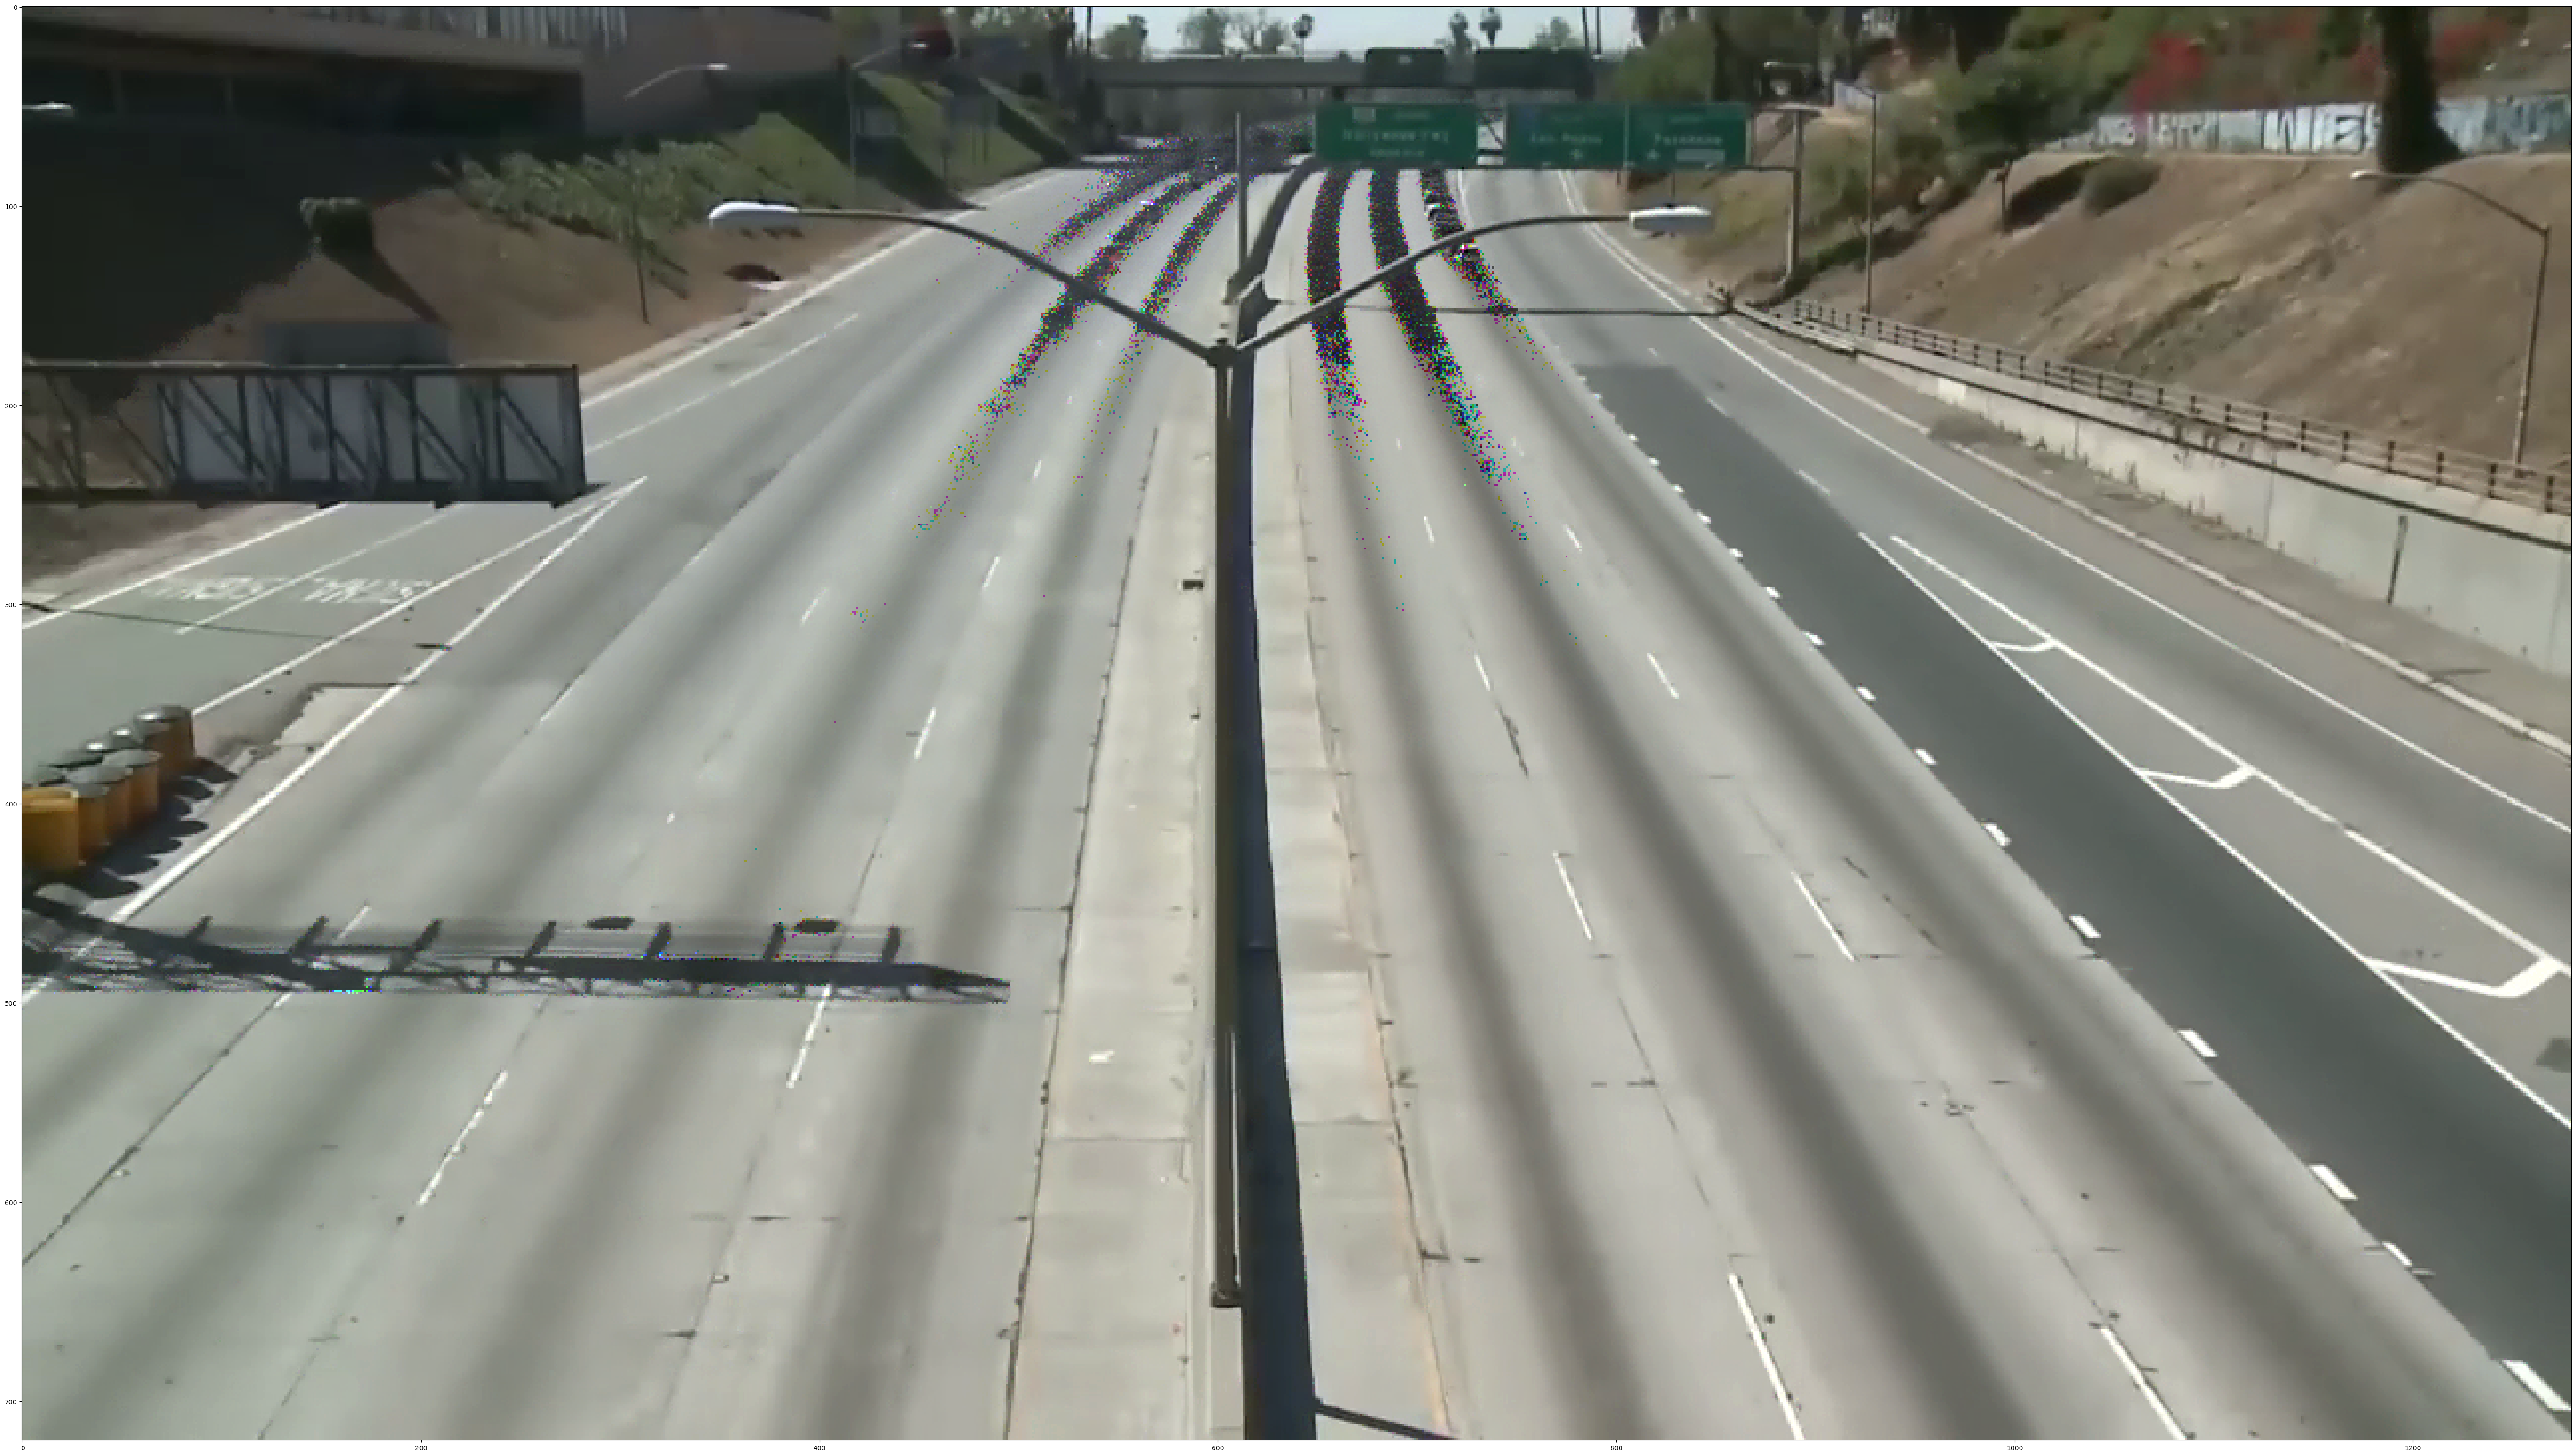

In [32]:
img = cv2.imread(r'traffic1m.png') # with MODE filter
plt.figure(figsize = (70,120))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### in the above image, some cars can be seen on the dark trail section

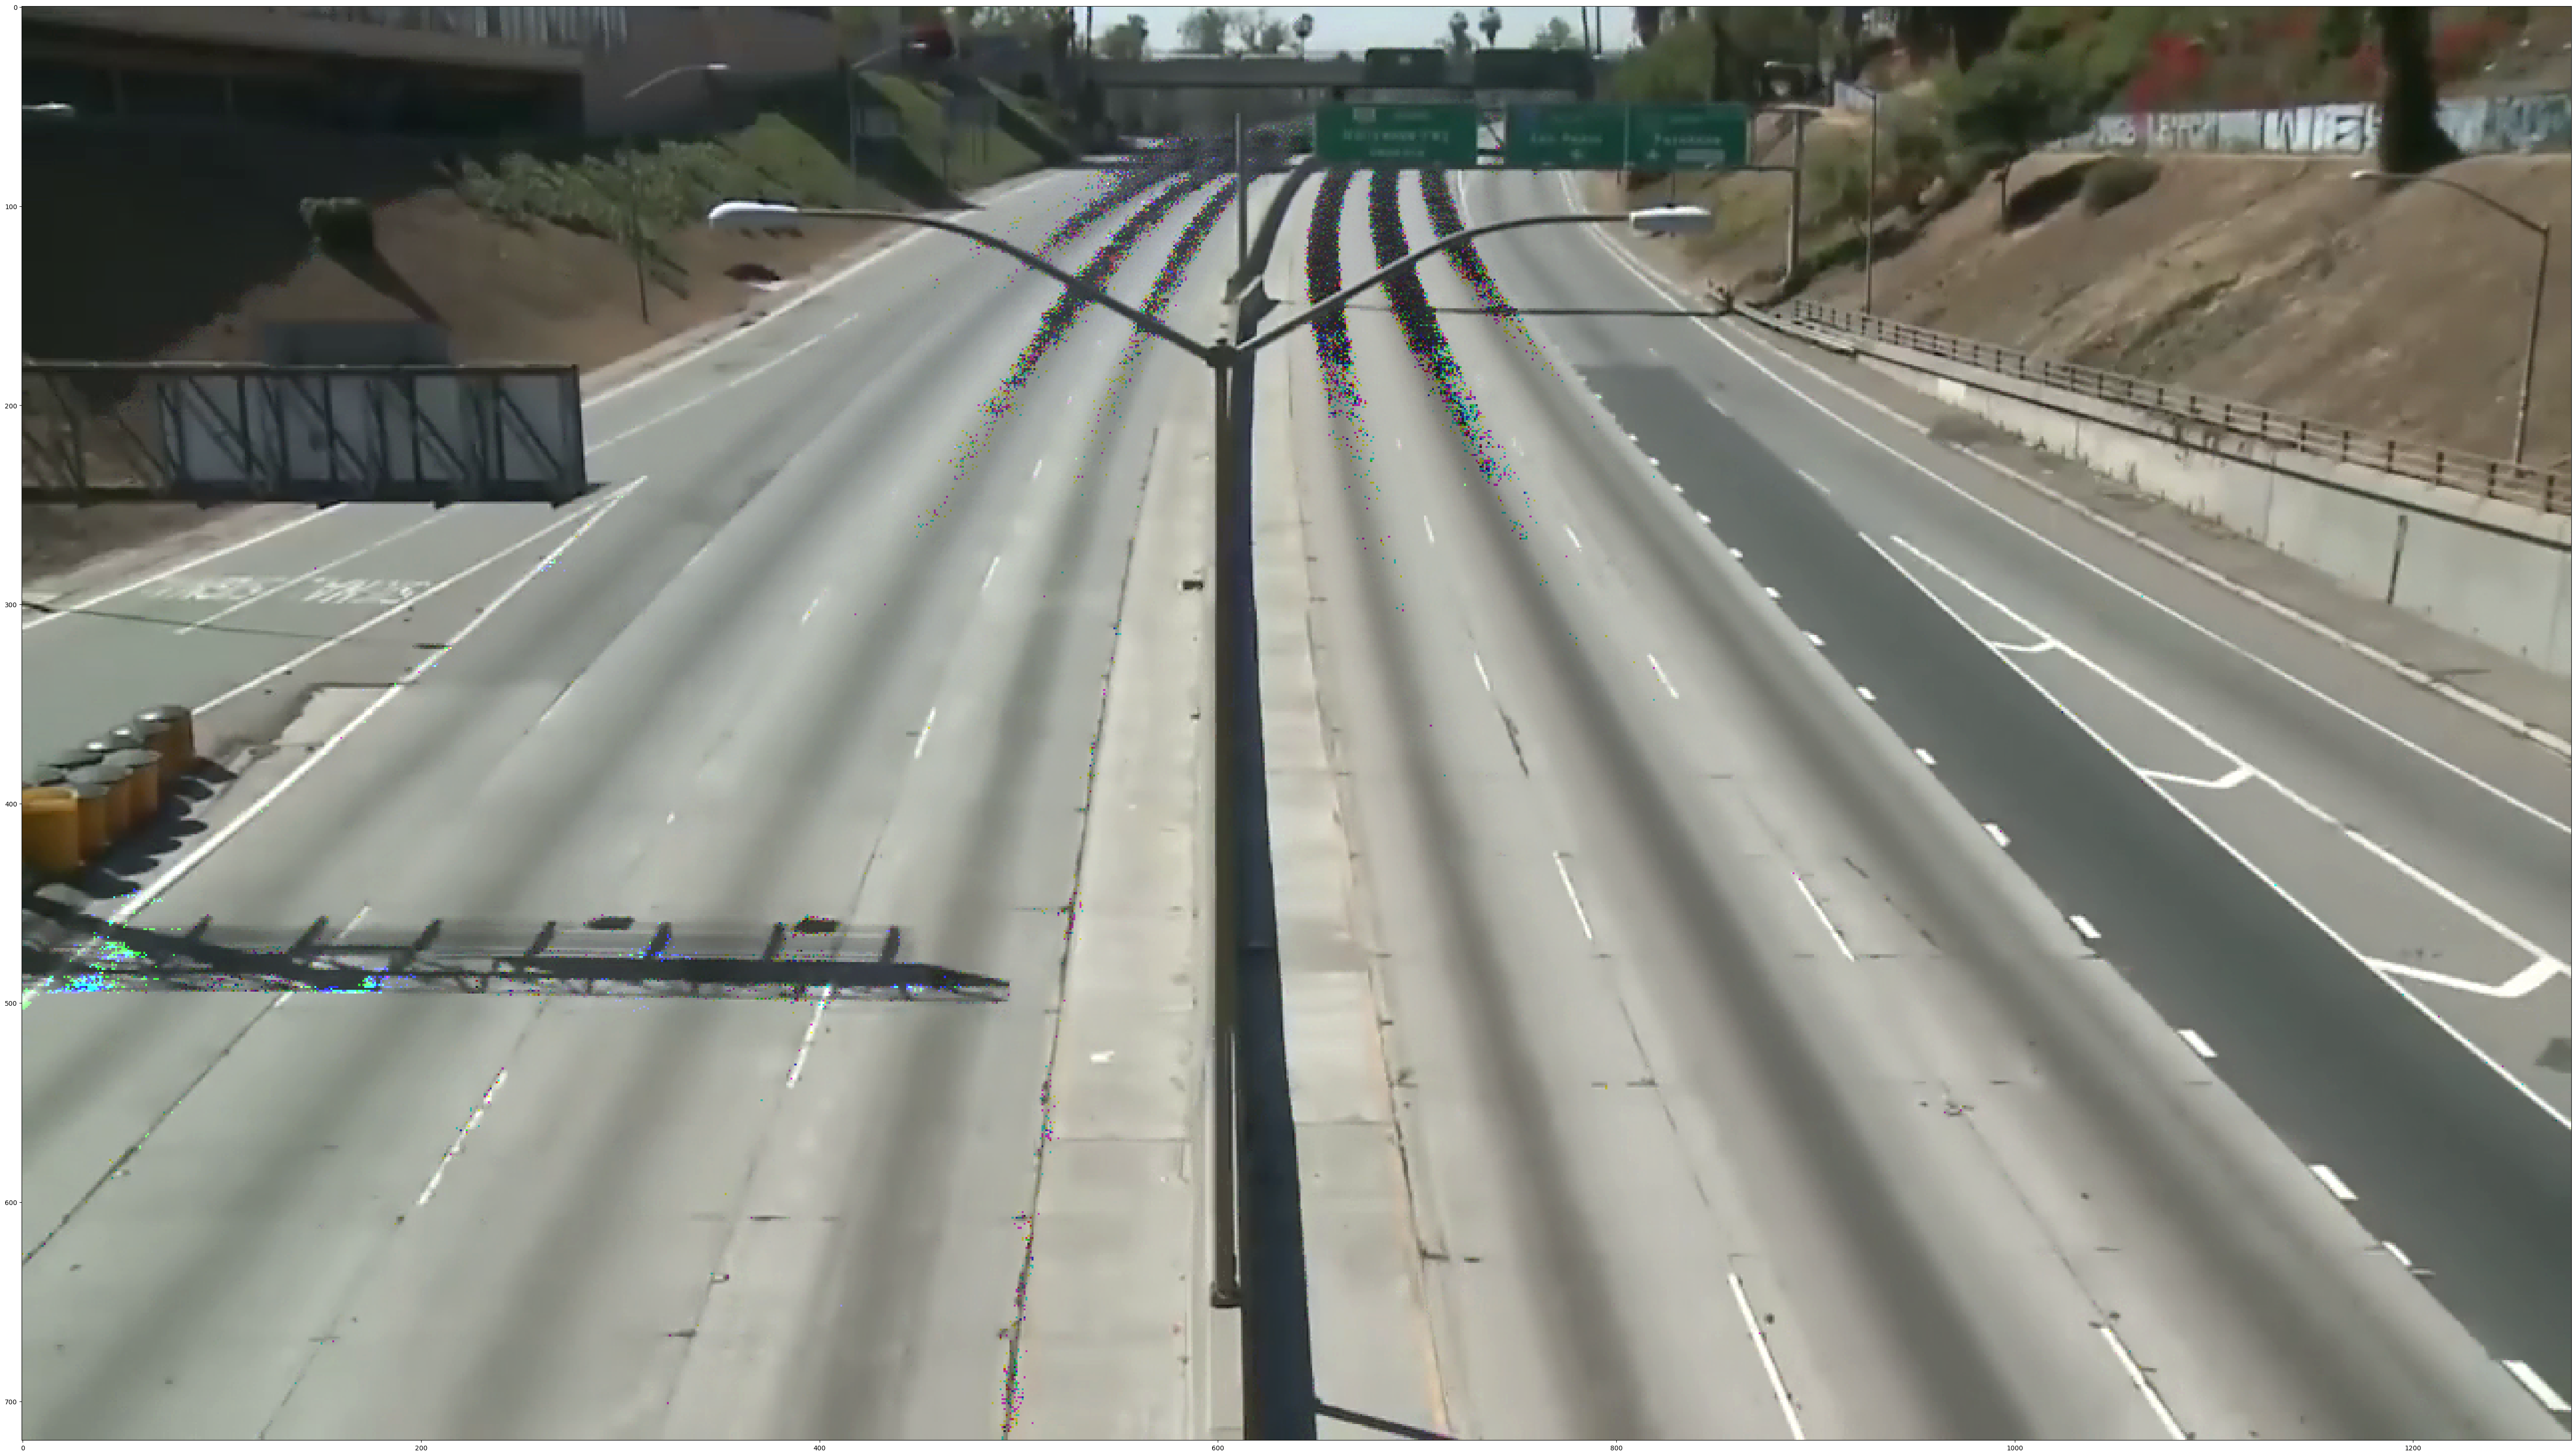

In [33]:
img = cv2.imread(r'traffic1gs2.png') # with get_stable2 filter
plt.figure(figsize = (70,120))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### in the above image, the cars are no longer there but some defected pixels on bottom left are clearly visible

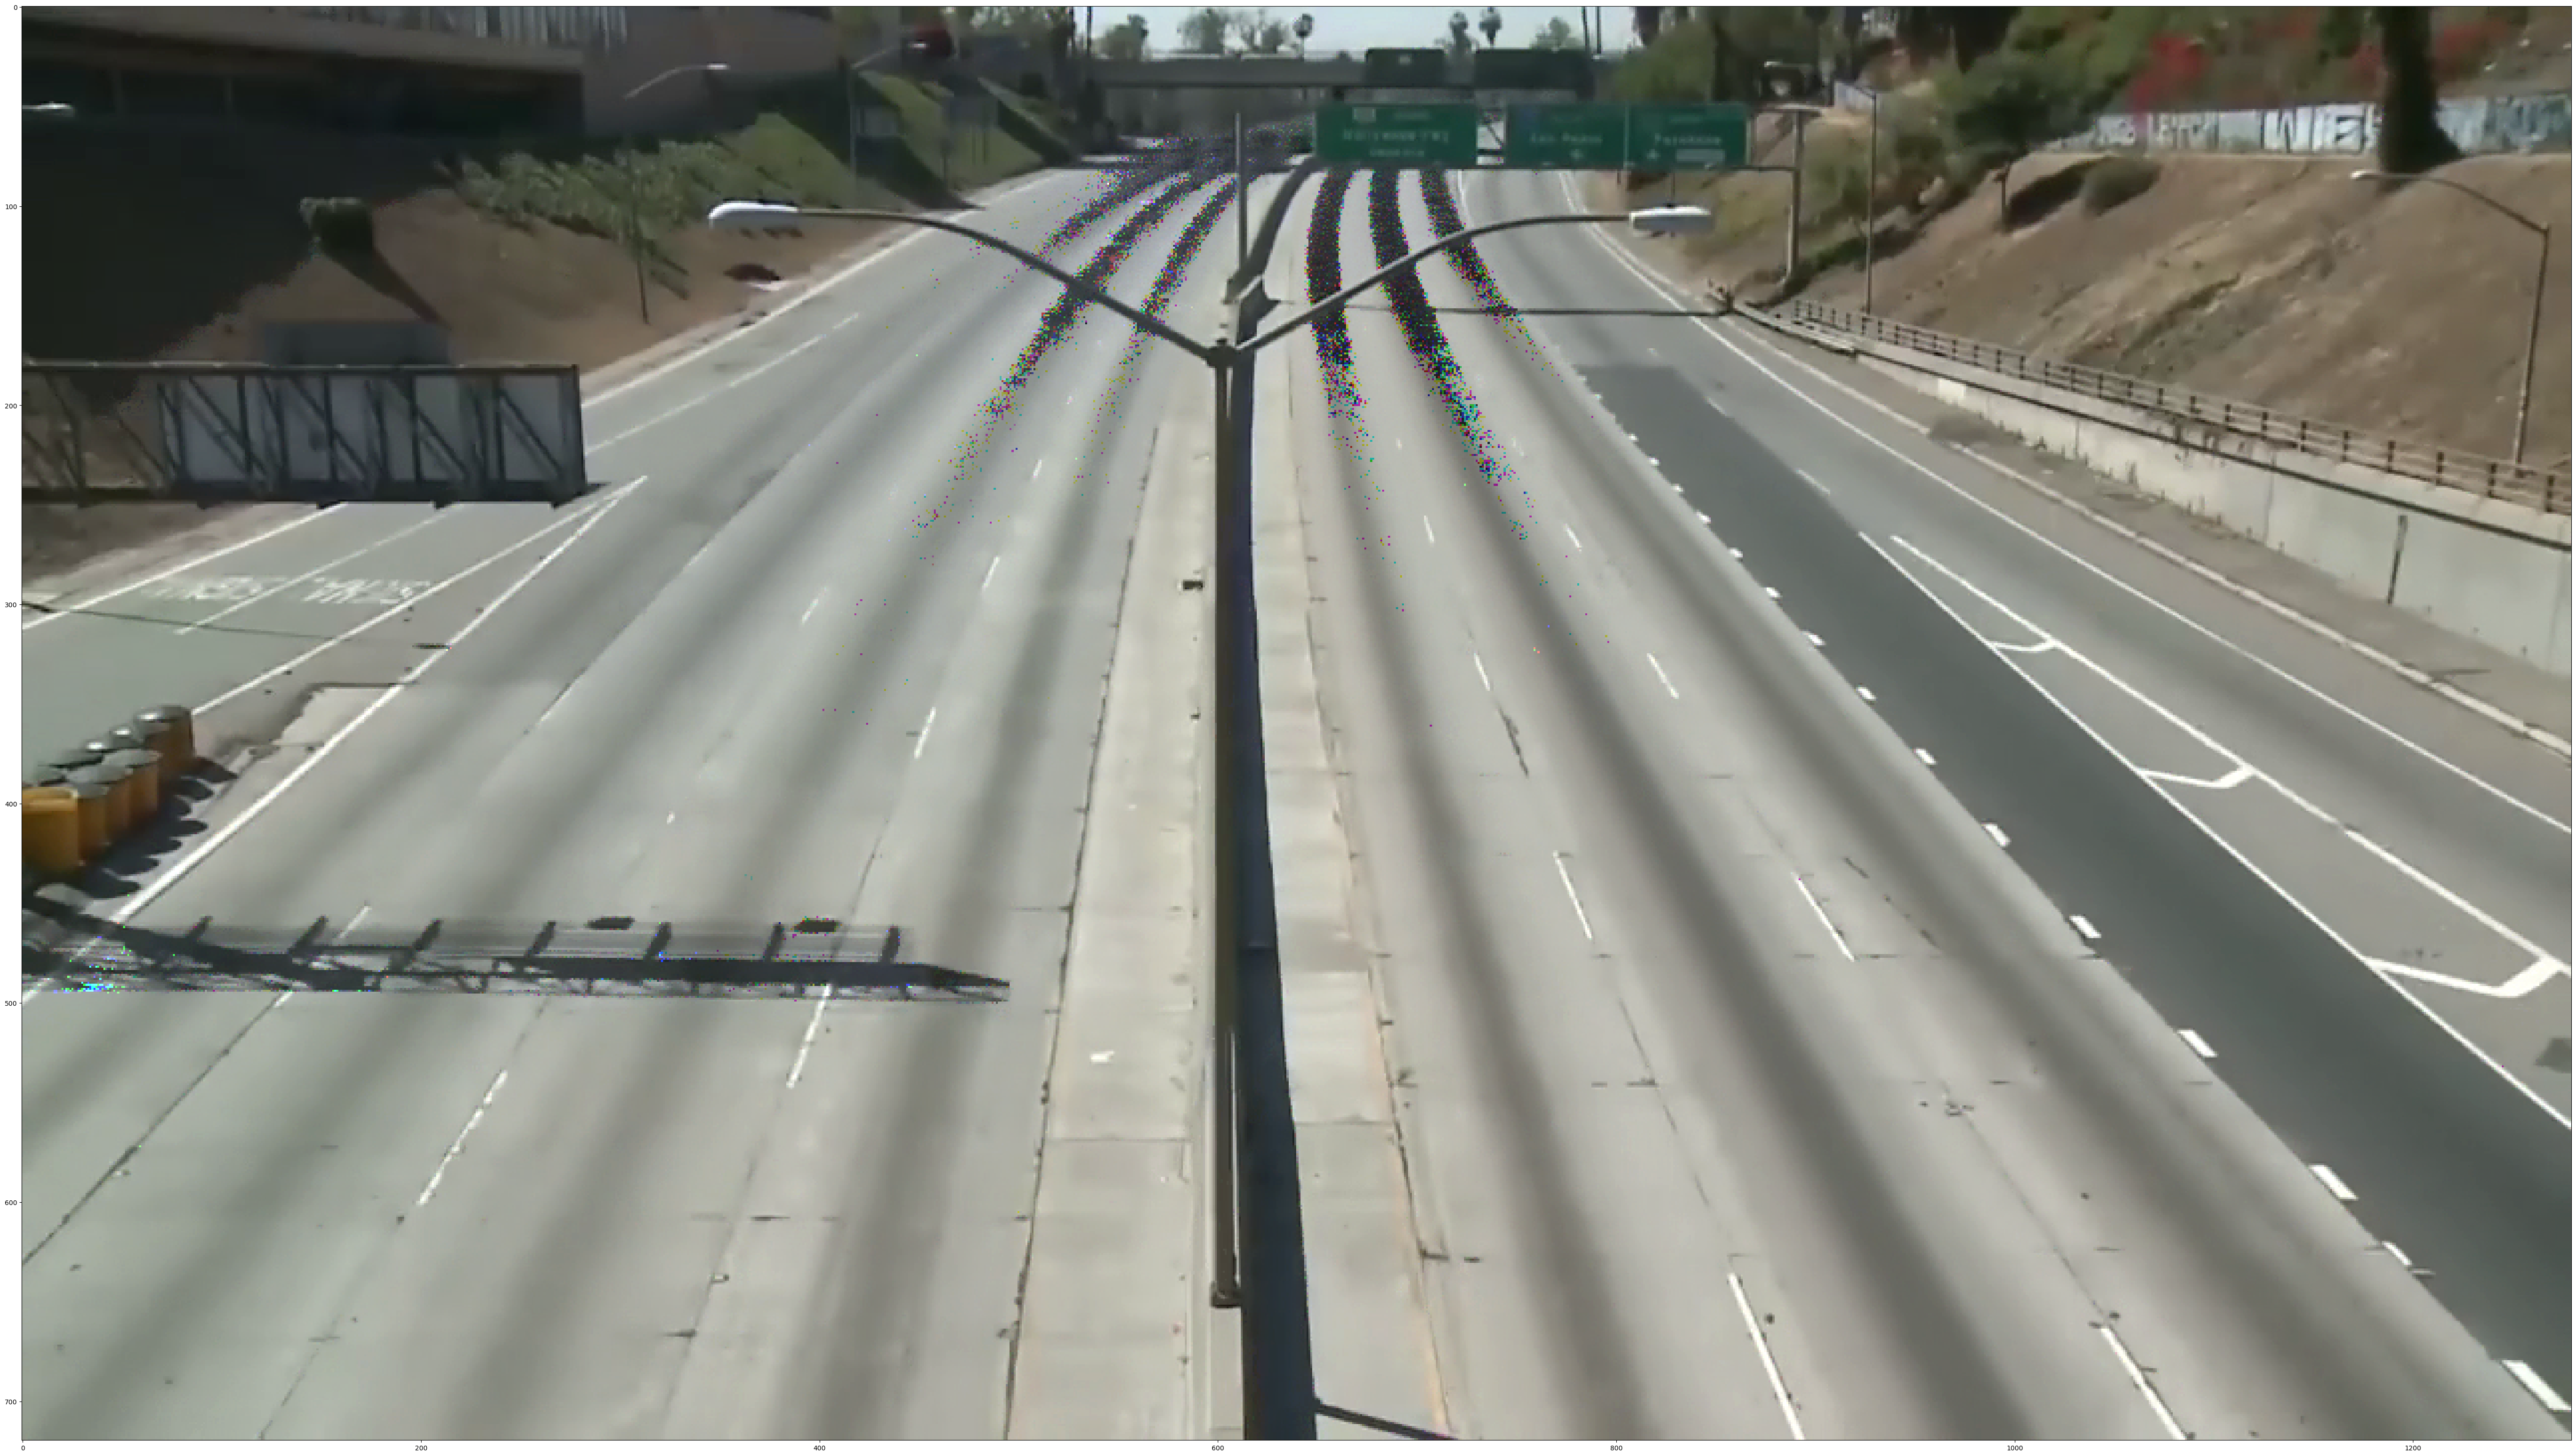

In [34]:
img = cv2.imread(r'traffic1gs.png') # with get_stable filter
plt.figure(figsize = (70,120))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### in the amage above, the bottom left pixeds have been corrected to some extent